# Análise de Sentimentos com Twitter - Tratamento de dados e score de sentimentos

Nesse notebook, iremos tratar os datasets extraídos no passo anterior e acrescentar um score de sentimento

# Importação de libs

In [1]:
%pip install deep_translator

In [2]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re
from textblob import TextBlob as tb
import numpy as np
from deep_translator import GoogleTranslator
import seaborn as sns

## Leitura de dataframe e unificação em único

In [4]:
df_clear = pd.read_excel("../arquivos/tweet_dataset_clear.xlsx")
df_rico = pd.read_excel('../arquivos/tweet_dataset_rico.xlsx')
df_xp = pd.read_excel('../arquivos/tweet_dataset_xpi.xlsx')
df_nubank = pd.read_csv('../arquivos/tweet_dataset_nubank.csv',encoding = 'utf-8')
df_itau = pd.read_csv('../arquivos/tweet_dataset_itau.csv',encoding = 'utf-8')
df_btg = pd.read_csv('../arquivos/tweet_dataset_btg.csv',encoding = 'utf-8')


In [5]:
df_clear['Marca'] = 'Clear'
df_xp['Marca'] = 'Xp'
df_rico['Marca'] = 'Rico'
df_nubank['Marca'] = 'Nubank'
df_itau['Marca'] = 'Itau'
df_btg['Marca'] = 'BTG'

In [6]:
# Unindo os Datasets
df_final = pd.concat([df_clear, df_xp, df_rico, df_nubank, df_itau, df_btg], axis =0, ignore_index = True)
df_final.head()

,Tweet Id,Tweet Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Marca
0,1521495234743516928,2022-05-03 14:21:46,3,False,0,0,b'@kimpaim Cancelando minha conta da @clear_co...,Clear
1,1521491055681617920,2022-05-03 14:05:10,377,False,1,0,b'@marvinoliveiras @EliVieiraJr @Bancointer @c...,Clear
2,1521479145859002112,2022-05-03 13:17:50,214,False,0,0,b'@EliVieiraJr @Bancointer agradec a Deus q s\...,Clear
3,1521467095443202048,2022-05-03 12:29:57,722,False,0,0,b'@PrivacyMistress @Bancointer @clear_corretor...,Clear
4,1521436858152062976,2022-05-03 10:29:48,96,False,1,0,b'@profBrivaldoJr @MetodoMoreira @hugomineirim...,Clear


# Tratamento de dataframe

Resolver problemas de encoding

In [7]:
fix_encoding = (
    lambda string: bytes(string.strip(), encoding='raw_unicode_escape')
    .decode('unicode_escape')
    .encode('latin1')
    .decode('utf-8') 
    )

Remover mentions e outros caracteres sem polaridade

In [8]:
remove_mentions = lambda string: re.sub("@\w+", " ", string)
remove_trailing_b = lambda string: re.sub("^b", " ", string)
remove_quotes = lambda string: re.sub("['|\"]", " ", string)
remove_initial_spaces = lambda string: re.sub("^\s+", " ", string)
#remove_links = lambda string: re.sub(r'^https?:\/\/.*[\r\n]*', '', string)
#remove_links= lambda string: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))'+, '', string, flags=re.MULTILINE)

In [9]:
df_final['Cleaned Tweets'] = (
    df_final['Tweet Text']
    .apply(fix_encoding)
    .apply(remove_mentions)
    .apply(remove_trailing_b)
    .apply(remove_quotes)
    .apply(remove_initial_spaces)
    #.apply(remove_links)
)

In [10]:
df_final.head()

,Tweet Id,Tweet Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Marca,Cleaned Tweets
0,1521495234743516928,2022-05-03 14:21:46,3,False,0,0,b'@kimpaim Cancelando minha conta da @clear_co...,Clear,Cancelando minha conta da
1,1521491055681617920,2022-05-03 14:05:10,377,False,1,0,b'@marvinoliveiras @EliVieiraJr @Bancointer @c...,Clear,"Cara, sai fora essas empresas. São boas nas m..."
2,1521479145859002112,2022-05-03 13:17:50,214,False,0,0,b'@EliVieiraJr @Bancointer agradec a Deus q s\...,Clear,"agradec a Deus q são só 3 dias, estou a quase..."
3,1521467095443202048,2022-05-03 12:29:57,722,False,0,0,b'@PrivacyMistress @Bancointer @clear_corretor...,Clear,Next tem conta pj e conta pf também? A minha...
4,1521436858152062976,2022-05-03 10:29:48,96,False,1,0,b'@profBrivaldoJr @MetodoMoreira @hugomineirim...,Clear,RLP dizem que é uma ferramenta q permite vc c...


In [ ]:
translate_text = lambda string: GoogleTranslator(source='portuguese', target='english').translate(string)

In [ ]:
df_final['Translated Tweets'] = df_final['Cleaned Tweets'].apply(translate_text)
df_final.head()

In [ ]:
df_final.to_csv('arquivos\df_final_traduzido.csv', index=False)  

In [11]:
df_final_t = pd.read_csv('../arquivos/df_final_traduzido.csv', encoding = 'utf-8')

In [18]:
df_final_t.head()

,Tweet Id,Tweet Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Marca,Cleaned Tweets,Translated Tweets,Sentiment
0,1.521495e+18,2022-05-03 14:21:46,3,False,0,0,b'@kimpaim Cancelando minha conta da @clear_co...,Clear,Cancelando minha conta da,Canceling my account from,Neutral
1,1.521491e+18,2022-05-03 14:05:10,377,False,1,0,b'@marvinoliveiras @EliVieiraJr @Bancointer @c...,Clear,"Cara, sai fora essas empresas. São boas nas m...","Dude, get out of these companies. They're good...",Positive
2,1.521479e+18,2022-05-03 13:17:50,214,False,0,0,b'@EliVieiraJr @Bancointer agradec a Deus q s\...,Clear,"agradec a Deus q são só 3 dias, estou a quase...","I thank God that it's only 3 days, I'm almost ...",Negative
3,1.521467e+18,2022-05-03 12:29:57,722,False,0,0,b'@PrivacyMistress @Bancointer @clear_corretor...,Clear,Next tem conta pj e conta pf também? A minha...,Next do you have a pj account and a pf account...,Positive
4,1.521437e+18,2022-05-03 10:29:48,96,False,1,0,b'@profBrivaldoJr @MetodoMoreira @hugomineirim...,Clear,RLP dizem que é uma ferramenta q permite vc c...,RLP say it is a tool that allows you to buy at...,Neutral


# TextBlob Polaridade dos textos

In [19]:
def sentiment_polarity(tweets_text_list):
      tweets_sentiments_list = []
      for tweet in tweets_text_list:
        polarity = tb(tweet).sentiment.polarity
        if polarity > 0:
          tweets_sentiments_list.append('Positive')
        elif polarity < 0:
          tweets_sentiments_list.append('Negative')
        else:
          tweets_sentiments_list.append('Neutral')
      
      return tweets_sentiments_list

In [20]:
df_final_t['Sentiment'] = sentiment_polarity(df_final_t['Translated Tweets'])
df_final_t.head()

,Tweet Id,Tweet Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Marca,Cleaned Tweets,Translated Tweets,Sentiment
0,1.521495e+18,2022-05-03 14:21:46,3,False,0,0,b'@kimpaim Cancelando minha conta da @clear_co...,Clear,Cancelando minha conta da,Canceling my account from,Neutral
1,1.521491e+18,2022-05-03 14:05:10,377,False,1,0,b'@marvinoliveiras @EliVieiraJr @Bancointer @c...,Clear,"Cara, sai fora essas empresas. São boas nas m...","Dude, get out of these companies. They're good...",Positive
2,1.521479e+18,2022-05-03 13:17:50,214,False,0,0,b'@EliVieiraJr @Bancointer agradec a Deus q s\...,Clear,"agradec a Deus q são só 3 dias, estou a quase...","I thank God that it's only 3 days, I'm almost ...",Negative
3,1.521467e+18,2022-05-03 12:29:57,722,False,0,0,b'@PrivacyMistress @Bancointer @clear_corretor...,Clear,Next tem conta pj e conta pf também? A minha...,Next do you have a pj account and a pf account...,Positive
4,1.521437e+18,2022-05-03 10:29:48,96,False,1,0,b'@profBrivaldoJr @MetodoMoreira @hugomineirim...,Clear,RLP dizem que é uma ferramenta q permite vc c...,RLP say it is a tool that allows you to buy at...,Neutral


In [21]:
df_final_t.to_csv('../arquivos/analise_final.csv', index=False)  

# Análise do dataframe

In [23]:
df_analise = df_final_t.groupby(['Marca','Sentiment']).agg(qtd_tweets=("Tweet Id","count"))
df_analise = df_analise.reset_index()
df_analise

,Marca,Sentiment,qtd_tweets
0,BTG,Negative,83
1,BTG,Neutral,159
2,BTG,Positive,97
3,Clear,Negative,4
4,Clear,Neutral,8
5,Clear,Positive,19
6,Itau,Negative,725
7,Itau,Neutral,1861
8,Itau,Positive,1297
9,Nubank,Negative,4741


In [24]:
df_total_tweets = df_analise.groupby('Marca').agg(total_tweets=("qtd_tweets","sum"))
df_total_tweets = df_total_tweets.reset_index()
df_total_tweets

,Marca,total_tweets
0,BTG,339
1,Clear,31
2,Itau,3883
3,Nubank,21780
4,Rico,97
5,Xp,3510


In [25]:
df_analise = df_analise.merge(df_total_tweets, on = 'Marca', how = 'left')
df_analise['perc_tweets'] = (df_analise['qtd_tweets']/df_analise['total_tweets'])*100

In [27]:
df_analise.head()

,Marca,Sentiment,qtd_tweets,total_tweets,perc_tweets
0,BTG,Negative,83,339,24.483776
1,BTG,Neutral,159,339,46.902655
2,BTG,Positive,97,339,28.613569
3,Clear,Negative,4,31,12.903226
4,Clear,Neutral,8,31,25.806452


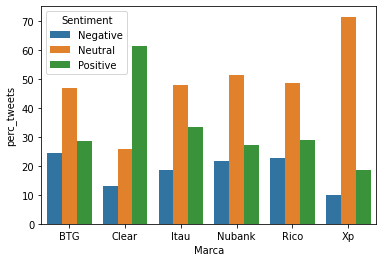

In [28]:
grafico1 = sns.barplot(x="Marca", y="perc_tweets", hue="Sentiment", data=df_analise)
